In [2]:
#Building CNN to classify images in the CIFAR-10 Dataset 
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten 
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt 
%matplotlib inline

Using TensorFlow backend.


In [3]:
# Shuffled data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
# The data, shuffled and split between train and test sets:
x_train[1203].shape

(32, 32, 3)

[4]


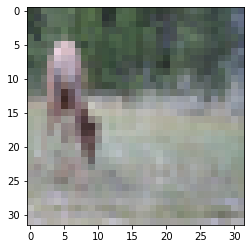

In [5]:
## Each image is a 32 x 32 x 3 numpy array
print(y_train[1203])
plt.imshow(x_train[1203]);

[3]


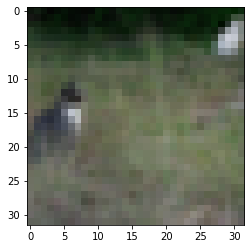

In [6]:
print(y_train[2130])
plt.imshow(x_train[2130]);

In [7]:
# Getting the number of classes and assigning them 
num_classes = 20

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [8]:
# Random one selected
y_train[5692]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [9]:
# As before, let's make everything float and scale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [14]:
# Let's build a CNN using Keras' Sequential capabilities
model_1 = Sequential()

model_1.add(Conv2D(32, (3, 3), padding='same',
                  input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))
model_1.add(Conv2D(32, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

model_1.add(Conv2D(64, (3, 3), padding='same'))
model_1.add(Activation('relu'))
model_1.add(Conv2D(64, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)       

In [17]:
# initiate RMSprop optimizer
opt_2 = keras.optimizers.RMSprop(lr=0.0005)


# Let's train the model using RMSprop
model_1.compile(loss='categorical_crossentropy',
               optimizer=opt_2,
               metrics=['accuracy'])

In [19]:
# Training model with inputs
model_1.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=20,
           validation_data=(x_test, y_test),
           shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 118s 2ms/step - loss: 1.6477 - accuracy: 0.4020 - val_loss: 1.2942 - val_accuracy: 0.5340
Epoch 2/20
50000/50000 [==============================] - 119s 2ms/step - loss: 1.2415 - accuracy: 0.5608 - val_loss: 1.0368 - val_accuracy: 0.6365
Epoch 3/20
50000/50000 [==============================] - 120s 2ms/step - loss: 1.0505 - accuracy: 0.6309 - val_loss: 0.9554 - val_accuracy: 0.6652
Epoch 4/20
50000/50000 [==============================] - 113s 2ms/step - loss: 0.9393 - accuracy: 0.6721 - val_loss: 0.8349 - val_accuracy: 0.7115
Epoch 5/20
50000/50000 [==============================] - 113s 2ms/step - loss: 0.8594 - accuracy: 0.7002 - val_loss: 0.7795 - val_accuracy: 0.7347
Epoch 6/20
50000/50000 [==============================] - 113s 2ms/step - loss: 0.8044 - accuracy: 0.7189 - val_loss: 0.7852 - val_accuracy: 0.7301
Epoch 7/20
50000/50000 [==============================] - 113s

In [20]:
#How to load pre-trained models such as VGG16 and ResNet. 
#Designed a model like VGG and Resnet and the output they give.

In [21]:
from PIL import Image
from keras.preprocessing import image
import numpy as np
import pandas as pd


import cv2
#from scipy.misc import imread
from scipy.misc.pilutil import imread
import matplotlib.pyplot as plt

%matplotlib inline

In [22]:
# VGG-16 Settings
def get_image(camera):
    retval, im = camera.read()
    return im

In [23]:
# VGG-16 Settings
def save_webcam_image(img_path):

    try:
        camera_port = 0
        ramp_frames = 10
    
        camera = cv2.VideoCapture(camera_port)

        for i in range(ramp_frames):
            retval, im_camera = camera.read()

        retval, im_camera = camera.read()

        im = cv2.resize(im_camera, (224, 224)).astype(np.float32)
        cv2.imwrite(img_path, im)
        del (camera)
        return True
    except ValueError as e:
        print("Image Capture Failed")
    return False

In [26]:
# Location of picture 
img_path ="/Users/danielcoelho/Desktop/img1.png"

/Users/danielcoelho/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning:     `imread` is deprecated!
    `imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


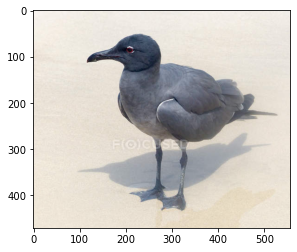

In [27]:
# Printing out image
plt.imshow(imread(img_path))

In [28]:
# VGG16 - Pretrained Model
from keras.applications import vgg16

vgg16_model = vgg16.VGG16(weights = 'imagenet')
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [29]:
# Utility Function to Load Image, Preprocess input and Targets
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(224, 224)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)
    
    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

In [30]:
# Getting prediction 
predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

,Predicted Class,Name,Probability
0,n02018207,American_coot,0.755701
1,n02017213,European_gallinule,0.194255
2,n01601694,water_ouzel,0.019308
3,n01580077,jay,0.005610
4,n02009229,little_blue_heron,0.003933
5,n01795545,black_grouse,0.003703
6,n01582220,magpie,0.003155
7,n02012849,crane,0.002541
8,n02037110,oystercatcher,0.002497
9,n01806143,peacock,0.002105


In [31]:
# Resnet 50 - Pretrained Model

from keras.applications import resnet50

resnet50_model = resnet50.ResNet50(weights = 'imagenet')
resnet50_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [32]:
# Predict Results
# Better guess of what the bird is
predict_image(resnet50_model, img_path, resnet50.preprocess_input, resnet50.decode_predictions)

,Predicted Class,Name,Probability
0,n02018207,American_coot,0.700626
1,n01601694,water_ouzel,0.059281
2,n02012849,crane,0.025876
3,n02009229,little_blue_heron,0.023887
4,n01855672,goose,0.020311
5,n01582220,magpie,0.019538
6,n02058221,albatross,0.019440
7,n02037110,oystercatcher,0.014926
8,n02113978,Mexican_hairless,0.005287
9,n02033041,dowitcher,0.004545


In [33]:
# Classifying CIIFAR-10 with Data Augmentatation
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [35]:
# Getting the number of classes and assigning them 
num_classes = 20

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [36]:
# Training assignments 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [37]:
# Let's build a CNN using Keras' Sequential capabilities
model_2 = Sequential()

model_2.add(Conv2D(32, (3, 3), padding = 'same',
                  input_shape = x_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(Conv2D(32, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size = (2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64, (3, 3), padding = 'same'))
model_2.add(Activation('relu'))
model_2.add(Conv2D(32, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size = (2, 2)))
model_2.add(Dropout(0.25))

# Flatten turn 3x3x32 into 288x1
model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_61 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_62 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 64)       

In [38]:
## Check number of parameters
batch_size = 45
# Initiate RMSprop optimizer
opt_2 = keras.optimizers.RMSprop(lr = 0.0005) 

#Train model using RMSprop
model_2.compile(loss = 'categorical_crossentropy',
               optimizer = opt_2,
               metrics = ['accuracy'])

In [40]:
# Training model with the inputs
datagen = ImageDataGenerator(
        featurewise_center = False,
        samplewise_center = False,
        featurewise_std_normalization = False,
        samplewise_std_normalization = False,
        zca_whitening = False,
        rotation_range = 0,
        width_shift_range = 0,
        height_shift_range = 0.1,
        horizontal_flip = True,
        vertical_flip = False)

datagen.fit(x_train)

model_2.fit_generator(datagen.flow(x_train, y_train,
                                  batch_size = batch_size),
                     steps_per_epoch = x_train.shape[0] // batch_size,
                     epochs = 40,
                     validation_data = (x_test, y_test))

Epoch 1/40
1111/1111 [==============================] - 98s 88ms/step - loss: 1.7104 - accuracy: 0.3743 - val_loss: 1.3122 - val_accuracy: 0.5309
Epoch 2/40
1111/1111 [==============================] - 100s 90ms/step - loss: 1.3504 - accuracy: 0.5152 - val_loss: 1.2319 - val_accuracy: 0.5646
Epoch 3/40
1111/1111 [==============================] - 97s 88ms/step - loss: 1.1960 - accuracy: 0.5768 - val_loss: 1.0403 - val_accuracy: 0.6367
Epoch 4/40
1111/1111 [==============================] - 97s 87ms/step - loss: 1.0891 - accuracy: 0.6165 - val_loss: 0.9099 - val_accuracy: 0.6819
Epoch 5/40
1111/1111 [==============================] - 97s 88ms/step - loss: 1.0180 - accuracy: 0.6423 - val_loss: 0.8883 - val_accuracy: 0.6884
Epoch 6/40
1111/1111 [==============================] - 97s 87ms/step - loss: 0.9688 - accuracy: 0.6605 - val_loss: 0.8248 - val_accuracy: 0.7091
Epoch 7/40
1111/1111 [==============================] - 106s 95ms/step - loss: 0.9276 - accuracy: 0.6766 - val_loss: 0.8195

In [41]:
# Using RNNs to classifty sentiment on IMDB data
from __future__ import print_function
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import SimpleRNN
from keras.datasets import imdb
from keras import initializers

In [42]:
# loading data and maximum length of a sequence
max_features = 30000
maxlen = 40
batch_size = 42

In [43]:
## Load in the data.  The function automatically tokenizes the text into distinct integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

/Users/danielcoelho/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/datasets/imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/danielcoelho/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/datasets/imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


25000 train sequences
25000 test sequences


In [44]:
# This pads (or truncates) the sequences so that they are of the maximum length
x_train = sequence.pad_sequences(x_train, maxlen = maxlen)
x_test = sequence.pad_sequences(x_test, maxlen = maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000, 40)
x_test shape: (25000, 40)


In [45]:
 #Here's what an example sequence looks like
x_train[456,:]

array([  195,     5,    11,     4,   130,    75,    28,   110,   230,
          99,    76,     7,    41,  5658,    56,    32,   120,     4,
         273,   196,   103,    75,    28,   340,   416,   602,    11,
          14,  3091,     5,  1948, 21019,   279,    13,    43,   286,
          11,     4,   208,  1310], dtype=int32)

In [47]:
# Keras Layer for (Vanilla) RNNs
## Let's build a RNN
rnn_hidden_dim = 10
word_embedding_dim = 70
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, word_embedding_dim))
model_rnn.add(SimpleRNN(rnn_hidden_dim,
                       kernel_initializer = initializers.RandomNormal(stddev = 0.001),
                       recurrent_initializer = initializers.Identity(gain = 1.0),
                       activation = 'relu',
                       input_shape = x_train.shape[1:]))
model_rnn.add(Dense(1, activation = 'sigmoid'))

## Note that most of the parameters come from the embedding layer
model_rnn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 70)          2100000   
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 10)                810       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 2,100,821
Trainable params: 2,100,821
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Training properties for compile 
rmsprop = keras.optimizers.RMSprop(lr = 0.0001)

model_rnn.compile(loss = 'binary_crossentropy',
                 optimizer = rmsprop,
                 metrics = ['accuracy'])

In [49]:
model_rnn.fit(x_train, y_train,
             batch_size = batch_size,
             epochs = 20,
             validation_data = (x_test, y_test))

/Users/danielcoelho/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 35s 1ms/step - loss: 0.6272 - accuracy: 0.6454 - val_loss: 0.5591 - val_accuracy: 0.7166
Epoch 2/20
25000/25000 [==============================] - 33s 1ms/step - loss: 0.5114 - accuracy: 0.7498 - val_loss: 0.5321 - val_accuracy: 0.7242
Epoch 3/20
25000/25000 [==============================] - 33s 1ms/step - loss: 0.4454 - accuracy: 0.7928 - val_loss: 0.4671 - val_accuracy: 0.7756
Epoch 4/20
25000/25000 [==============================] - 33s 1ms/step - loss: 0.4001 - accuracy: 0.8203 - val_loss: 0.4454 - val_accuracy: 0.7888
Epoch 5/20
25000/25000 [==============================] - 33s 1ms/step - loss: 0.3698 - accuracy: 0.8375 - val_loss: 0.4417 - val_accuracy: 0.7934
Epoch 6/20
25000/25000 [==============================] - 35s 1ms/step - loss: 0.3479 - accuracy: 0.8506 - val_loss: 0.4276 - val_accuracy: 0.8020
Epoch 7/20
25000/25000 [==============================] - 35s 1ms/st

In [50]:
# Getting the test score and its accuracy 
score, acc = model_rnn.evaluate(x_test, y_test,
                               batch_size = batch_size)
print('Test score:', score)
print('Test accuracy', acc)

25000/25000 [==============================] - 4s 141us/step
Test score: 0.44863962470531465
Test accuracy 0.8035200238227844
